# Math 134C Week 10

In [1]:
import math
import numpy as np
from scipy.stats import norm
from scipy.stats.mstats import gmean

def black_scholes_call(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    call_price = S_t * np.exp(-delta * dt) * norm.cdf(d1) - K * np.exp(-r * dt) * norm.cdf(d2)
    return call_price

def black_scholes_put(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    call_price = - S_t * np.exp(-delta * dt) * norm.cdf(-d1) + K * np.exp(-r * dt) * norm.cdf(-d2)
    return call_price

def call_Delta(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))  
    return np.exp(-delta * dt) * norm.cdf(d1)

def put_Delta(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))  
    return -np.exp(-delta * dt) * norm.cdf(-d1)

def Gamma(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    return np.exp(-delta * dt) * norm.pdf(d1)/(S_t * sigma * np.sqrt(dt)) 

def call_Theta(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    return delta * S_t * np.exp(-delta * dt)*norm.cdf(d1) - r * K * np.exp(-r*dt)*norm.cdf(d2)-(K * np.exp(-r*dt) * sigma * norm.pdf(d2))/ (2 * np.sqrt(dt)) 

def put_Theta(S_t, K, dt, r, sigma, delta):
    d1 = (np.log(S_t / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))
    d2 = d1 - sigma * np.sqrt(dt)
    return call_Theta(S_t, K, dt, r, sigma, delta) + r * K * np.exp(-r*dt) - delta * S_t * np.exp(-delta * dt)

def put_given_call(C_t, S_t, K, r, dt):
    return C_t - S_t + K * math.exp(-r * dt)
def call_given_put(P_t, S_t, K, r, dt):
    return P_t + S_t - K * math.exp(-r * dt)

def one_step_binomial(r, dt, u, d, Vu, Vd, delta = 0):
    q = (math.exp((r - delta) * dt) - d)/(u-d)
    if not (1 > q > 0): 
        print("Arbitrage opportunity exists")
        return -1
    return math.exp(-r * dt)*(q*Vu+(1-q)*Vd)    

def stock_price_simulation(T, N, r, delta, sigma, S0):
    dt = float(T) / N
    t = np.linspace(0, T, N+1)
    S = np.zeros(N+1)
    S[0] = S0
    for i in range(1, N+1):
        Z = np.random.normal(0, 1)
        S[i] = S[i-1] * np.exp((r - delta - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    return t, S

**Quiz 9.1**
![](./img/week10_1.png)

In [7]:
q = (np.exp(0.05-0.04) - 0.6)/(1.3-0.6)
print(q)
Cu = np.exp(-0.05) * (q * 59)
print(Cu)
P = np.exp(-0.05) * (q * (Cu-5))
print(P)

0.5857859529773828
32.87579326094541
15.532861292062652


**Quiz 9.2**
For this problem please assume the risk-free annual interest rate is 5.35\% and the underlying stock has a current price of 41.75 and volatility of 0.34. Also assume there are 365 days until expiration.

Using the Monte Carlo methodology with one day time steps, compute the value of an exotic Asian-style geometric average price European put option with a strike price of 55 using 10,000 trials.

Please round your answer to the nearest integer.

In [8]:
T = 1
N = 365
r = 0.0535
delta = 0
sigma = 0.34
S0 = 41.75
K = 55
n_trials = 10000

price_sum = 0
for i in range(n_trials):
    t,S = stock_price_simulation(T, N, r, delta, sigma, S0)
    Smean = gmean(S)
    price_sum += np.exp(-r) * max(0, K - Smean)

print(price_sum/n_trials)

12.260054536502018


**Quiz 9.3**
For this problem please assume the risk-free annual interest rate is 5.35% and the underlying stock has a current price of 41.75 and volatility of 0.34. Also assume there are 365 days until expiration.

Using the Monte Carlo methodology, compute the value of an exotic Asian-style arithmetic average strike European put option using 10,000 trials.

Please round your answer to the nearest integer.

In [10]:
T = 1
N = 365
r = 0.0535
delta = 0
sigma = 0.34
S0 = 41.75
K = 55
n_trials = 10000

price_sum = 0
for i in range(n_trials):
    t,S = stock_price_simulation(T, N, r, delta, sigma, S0)
    Smean = S.mean()
    price_sum += np.exp(-r) * max(0, Smean-S[-1])

print(price_sum/n_trials)

2.7140369115642207


**Quiz 9.4**
In this problem you must  construct a 3-period binomial tree for modeling the price movements of a stock.  Assume the following form for the up and down movements in the stock price over each period h:

$$u = e^{(r-\delta)h+\sigma\sqrt{h}}$$
$$d = e^{(r-\delta)h-\sigma\sqrt{h}}$$

Also you are given:

![](./img/week10_2.png)

To be clear, the compound option expires 3 months from today, while the underlying 6-month 100-strike European put option starts 3 months from today and expires 9 months from today.

In [2]:
r = 0.1
delta = 0.08
h = 0.25
sigma = 0.32
S0 = 110

u = np.exp((r-delta)*h + sigma * np.sqrt(h))
d = np.exp((r-delta)*h - sigma * np.sqrt(h))
# print(u,d)
Su = S0 * u
Sd = S0 * d
Suu = S0 *u * u
Sud = S0* u *d 
Sdd = S0 * d*d
Suuu = S0 * u * u * u
Suud = S0 * u * u *d
Sudd = S0 * u * d * d
Sddd = S0 * d * d * d
# print(Su, Sd, Suu, Sud, Sdd, Suuu, Suud, Sudd, Sddd)

q = (np.exp((r-delta)*h)-d)/(u-d)
# print(q)

Pu = np.exp(-r * 2 * h)*(q**2 * 0 + 2 * q * (1-q) * 0 + (1-q)**2 * (100 - Sudd))
Pd = np.exp(-r * 2 * h)*(q**2 * 0 + 2 * q * (1-q) * (100-Sudd) + (1-q)**2 * (100 - Sddd))

# print(Pu, Pd)

P = np.exp(-r * h) * (q * (5-Pu))
print(f"The price of this compound option is {P:.2f}")

The price of this compound option is 1.64


**Quiz 9.5**
The initial price of a stock is 45. The stock does not pay dividends.

The continuously compounded risk-free annual interest rate is 10%.

An American call option on the stock expires in 1 year and has a strike price of 40.

A 3-month European call on a put with exercise price 0.80 allows the owner to buy a European put option expiring at the end of year 1 on the same stock with strike price 40.

After 3 months, on the day the compound option expires, the price of the stock is 48, and the American call option has a price of 11.82, with 9 months left to expiration.

Calculate the payoff of the call on put compound option on the day it expires.

In [19]:
S0 = 45
delta = 0
T = 1
K = 40


P = put_given_call(11.82, 48, 40, 0.1, 0.75)
print(P)
print("The payoff of this call-on-put option is", P - 0.8)

0.9297394531421119
The payoff of this call-on-put option is 0.12973945314211188


**Quiz 9.6**
![](./img/week10_3.png)

**Quiz 9.7**
![](./img/week10_4.png)

**Solution:** statements II, III are true

**Quiz 9.8**
![](./img/week10_5.png)
True or False:  Pin risk for a European call option is the risk that the call option's delta flips between zero and one as the option flips from being slightly out of the money to slightly in the money, making delta hedging difficult.

**Solution:** True. This is from the definition of the pin risk. 

For the following five problems, unless otherwise stated, assume that $S_0 = 100, \alpha = 0.08, \sigma = 0.30$, and $\delta = 0$.

**Exercise 18.8** What is $P(S_t > 105)$ for $t = 1$? How does this probability change when you change t? How does it change when you change σ?

In [7]:
S0 = 100
alpha = 0.08
sigma = 0.3
delta = 0

def d1(S0, K, dt, r, sigma, delta):
    return (np.log(S0 / K) + (r -delta + 0.5 * sigma ** 2) * dt) / (sigma * np.sqrt(dt))

def d2(S0, K, dt, r, sigma, delta):
    return d1(S0, K, dt, r, sigma, delta) - sigma * np.sqrt(dt)

print(f"The probability is {norm.cdf(d2(S0, 105, 1, alpha, sigma, delta)):.4f}")
print("The probability increase as t increase")
print("The probability decrease as sigma increase")

The probability is 0.4817
The probability increase as t increase
The probability decrease as sigma increase


**Exercise 18.9** What is $E(S_t |S_t > 105)$ for $t = 1$? How does this expectation change when you change $t$ , $\sigma$, and $\alpha$?

In [8]:
print(f"The conditional expected value is {S0 * np.exp(alpha-delta) * norm.cdf(d1(S0, 105, 1, alpha, sigma, delta))/norm.cdf(d2(S0, 105, 1, alpha, sigma, delta)):.4f}")
print(f"The expected value increase as t increase")
print(f"The expected value increase as sigma increase")
print(f"The expected value increase as alpha increase")

The conditional expected value is 135.0015
The expected value increase as t increase
The expected value increase as sigma increase
The expected value increase as alpha increase


**Exercise 18.10** What is $P(S_t < 98)$ for $t = 1$? How does this probability change when you change t?

The probability is 0.4270
The probability decrease as t increase


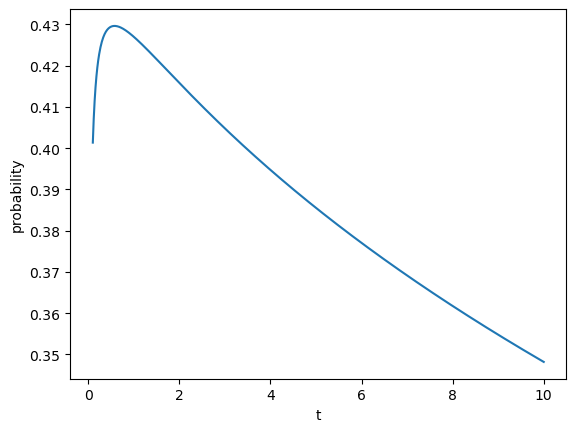

In [22]:
import matplotlib.pyplot as plt
print(f"The probability is {norm.cdf(-d2(S0, 98, 1, alpha, sigma, delta)):.4f}")

t_list = np.linspace(0.1, 10, 1000)
p_list = []
for t in t_list:
    p_list.append(norm.cdf(-d2(S0, 98, t, alpha, sigma, delta)))
plt.plot(t_list, p_list)
plt.xlabel("t")
plt.ylabel("probability")
print("The probability decrease as t increase")
plt.show()

**Exercise 18.11** Let $t = 1$. What is $E(S_t |S_t < 98)$? What is $E(S_t |S_t < 120)$? How do both expectations change when you vary t from 0.05 to 5? Let $\sigma = 0.1$. Does either answer change? How?

The conditional expected value for St<98 is 79.7085
The conditional expected value for St<120 is 90.6157
If sigma drops to 0.1, then
The conditional expected value for St<98 is 92.9898
The conditional expected value for St<120 is 105.3459


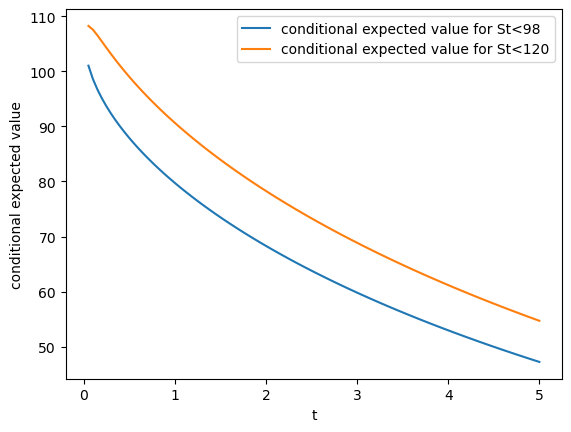

From the graph, we see that both expected value decrease as t increase


In [17]:
import matplotlib.pyplot as plt

print(f"The conditional expected value for St<98 is {S0 * np.exp(alpha-delta) * norm.cdf(-d1(S0, 98, 1, alpha, sigma, delta))/norm.cdf(-d2(S0, 98, 1, alpha, sigma, delta)):.4f}")
print(f"The conditional expected value for St<120 is {S0 * np.exp(alpha-delta) * norm.cdf(-d1(S0, 120, 1, alpha, sigma, delta))/norm.cdf(-d2(S0, 120, 1, alpha, sigma, delta)):.4f}")

print(f"If sigma drops to 0.1, then")
print(f"The conditional expected value for St<98 is {S0 * np.exp(alpha-delta) * norm.cdf(-d1(S0, 98, 1, alpha, 0.1, delta))/norm.cdf(-d2(S0, 98, 1, alpha, 0.1, delta)):.4f}")
print(f"The conditional expected value for St<120 is {S0 * np.exp(alpha-delta) * norm.cdf(-d1(S0, 120, 1, alpha, 0.1, delta))/norm.cdf(-d2(S0, 120, 1, alpha, 0.1, delta)):.4f}")

t_list = np.linspace(0.05, 5, 101)
expected_value_list_98 = []
expected_value_list_120 = []
for t in t_list:
    expected_value_list_98.append(S0 * np.exp(alpha-delta) * norm.cdf(-d1(S0, 98, t, alpha, sigma, delta))/norm.cdf(-d2(S0, 98, t, alpha, sigma, delta)))
    expected_value_list_120.append(S0 * np.exp(alpha-delta) * norm.cdf(-d1(S0, 120, t, alpha, sigma, delta))/norm.cdf(-d2(S0, 120, t, alpha, sigma, delta)))
    
plt.plot(t_list, expected_value_list_98, label = "conditional expected value for St<98")
plt.plot(t_list, expected_value_list_120, label = "conditional expected value for St<120")
plt.legend()
plt.xlabel("t")
plt.ylabel("conditional expected value")
plt.show()

print("From the graph, we see that both expected value decrease as t increase")

**Exercise 18.12** Let $K_T = S_0e^{rT}$ . Compute $Pr(S_T <K_T )$ and $Pr(S_T >K_T)$ for a variety of T s from 0.25 to 25 years. How do the probabilities behave? How do you reconcile your answer with the fact that both call and put prices increase with time?

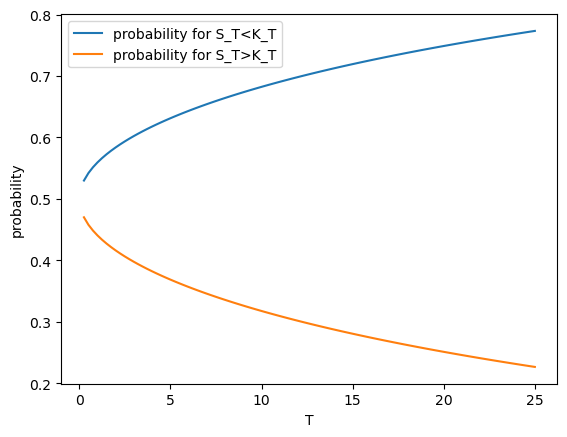

From the graph, we see that the probability for S_T<K_T increase as T increase, and probability for S_T>K_T decrease as T increase
The does not contradict that the price for both call/put option increase with time. This is because that the price for options depends on the expected stock price, not the probability that it is in the money


In [20]:
t_list = np.linspace(0.25, 25, 101)
P_smaller_list = []
P_greater_list = []
for t in t_list:
    P_smaller_list.append(norm.cdf(-d2(S0, S0 * np.exp(alpha * t), t, alpha, sigma, delta)))
    P_greater_list.append(norm.cdf(d2(S0, S0 * np.exp(alpha * t), t, alpha, sigma, delta)))
plt.plot(t_list, P_smaller_list, label = "probability for S_T<K_T")
plt.plot(t_list, P_greater_list, label = "probability for S_T>K_T")
plt.legend()
plt.xlabel("T")
plt.ylabel("probability")
plt.show()
print("From the graph, we see that the probability for S_T<K_T increase as T increase, and probability for S_T>K_T decrease as T increase")
print("The does not contradict that the price for both call/put option increase with time. This is because that the price for options depends on the expected stock price, not the probability that it is in the money")